# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)


#### Импорт библиотек

In [2]:
#Данные
import pandas as pd
import numpy as np

#Визуализация
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#Модели
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score

#### Импорт данных

In [3]:
geo = pd.read_excel('geo.xlsx')
geo.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


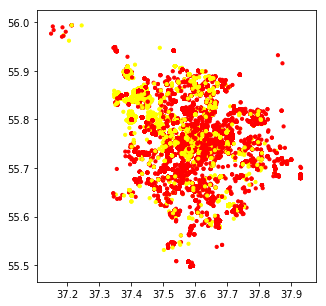

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(geo['x'], geo['y'], c=geo['comment_class'], cmap='autumn', s=10)

#### Preprocessing

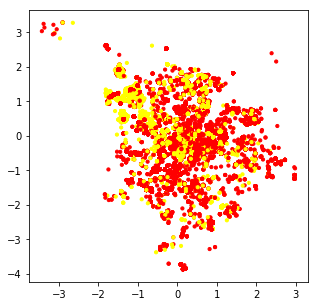

In [5]:
# Нормализация данных
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo[['x', 'y']])
y = geo['comment_class']

#Отображение нормализованных данных на графике
plt.figure(figsize=(5,5))
plt.scatter(geo_scaled[:, 0], geo_scaled[:, 1], c=y, cmap='autumn', s=10)

### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

#### Изучение районов безотносительно голосов

In [6]:
# Кластеризация с помощью метода DBSCAN
method = DBSCAN(eps=0.08, metric='cityblock')
clusters = method.fit_predict(geo_scaled)

df = pd.DataFrame({'x':geo_scaled[:,0],'y':geo_scaled[:,1], 'cluster':clusters})
df_norm = df[(df.cluster!=-1)]

In [7]:
def get_descr(algo_name, y, y_pred, X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

Text(0.5,1,'DBSCAN')

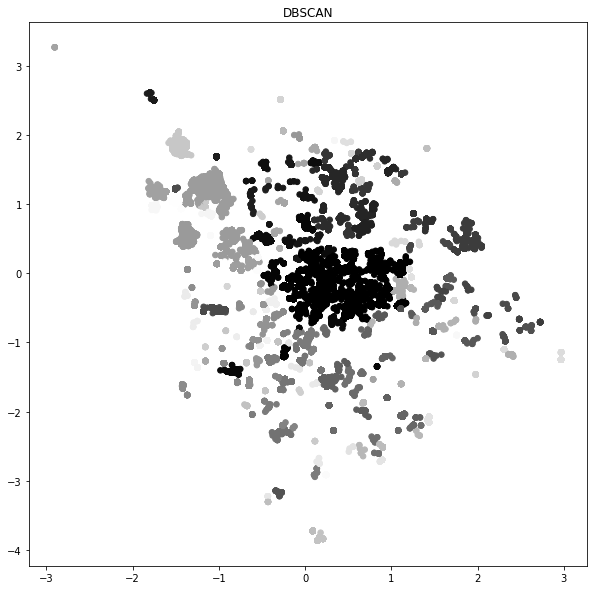

In [10]:
# Результаты класстеризации (без выбросов)
plt.figure(figsize=(10,10))
plt.scatter(df_norm.x,df_norm.y, c=df_norm.cluster, cmap='gray', s=30)
plt.title('DBSCAN')

#### Изучение районов с учетом голосов

In [ ]:
# польжительные оценки

In [ ]:
# отрицательные оценки

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию